中文字体启用： Noto Sans SC


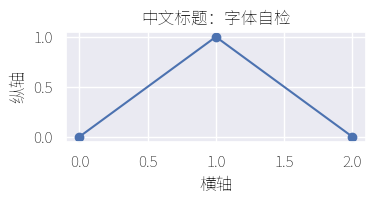

In [47]:
# --- 中文字体离线配置（使用本地 NotoSansSC-Black.ttf） ---
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams
import seaborn as sns
from pathlib import Path

# 本地字体文件（请将 NotoSansSC-Black.ttf 放在 Notebook 同目录）
FONT_FILE = Path("NotoSansSC-Black.ttf")
plt.rcParams['font.sans-serif'] = ['SimHei']

if not FONT_FILE.exists():
    raise FileNotFoundError(f"请把 {FONT_FILE} 放到当前目录下")

# 注册并获取字体名称
fm.fontManager.addfont(str(FONT_FILE.resolve()))
FONT_NAME = fm.FontProperties(fname=str(FONT_FILE.resolve())).get_name()

# 设置 Matplotlib & Seaborn 默认字体
rcParams["font.family"] = [FONT_NAME]
rcParams["axes.unicode_minus"] = False
sns.set_theme(font=FONT_NAME, rc={"axes.unicode_minus": False})

print("中文字体启用：", FONT_NAME)

# --- 验证 ---
plt.figure(figsize=(4,2.2))
plt.title("中文标题：字体自检")
plt.xlabel("横轴")
plt.ylabel("纵轴")
plt.plot([0,1,2],[0,1,0], "o-")
plt.tight_layout()
plt.show()


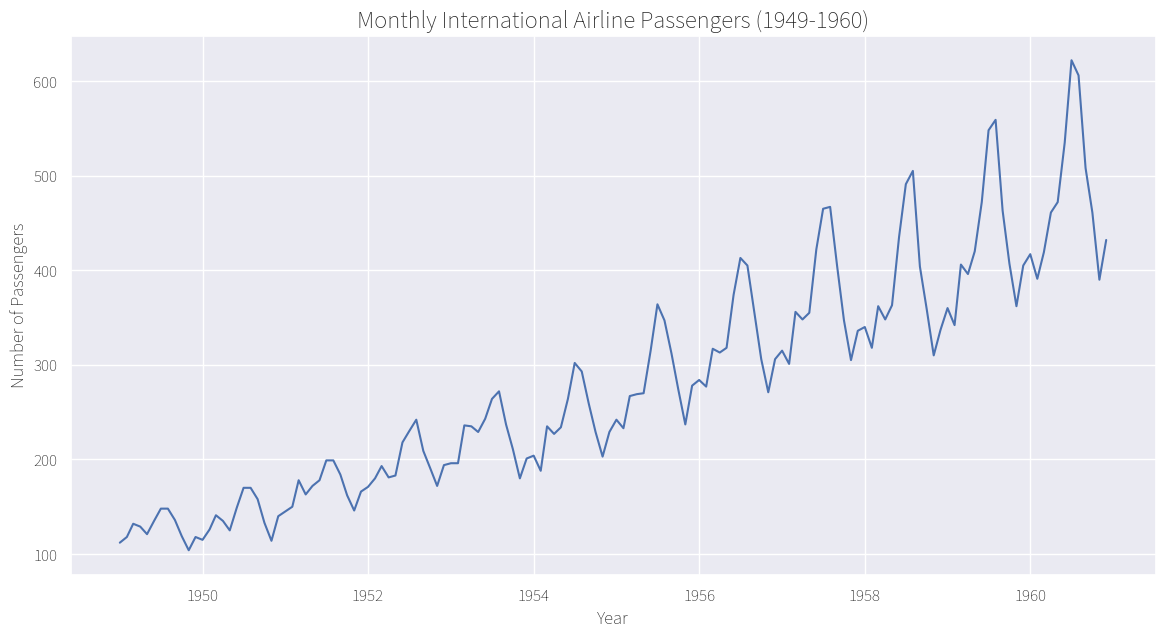

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the AirPassengers dataset from a known public URL
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)
df.columns = ['Passengers']
# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(df['Passengers'])
plt.title('Monthly International Airline Passengers (1949-1960)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.grid(True)
plt.show()


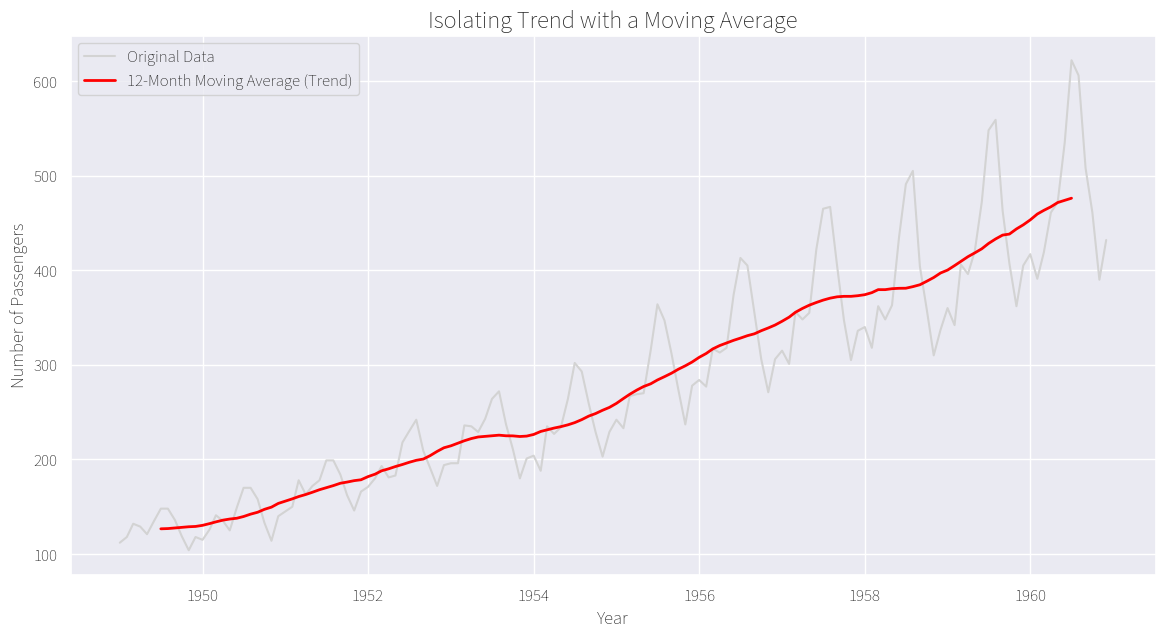

In [3]:
# Calculate and plot a 12-month centered moving average to isolate the trend
rolling_mean = df['Passengers'].rolling(window=12, center=True).mean()
plt.figure(figsize=(14, 7))
plt.plot(df['Passengers'], label='Original Data', color='lightgray')
plt.plot(rolling_mean, label='12-Month Moving Average (Trend)', color='red', linewidth=2)
plt.title('Isolating Trend with a Moving Average', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


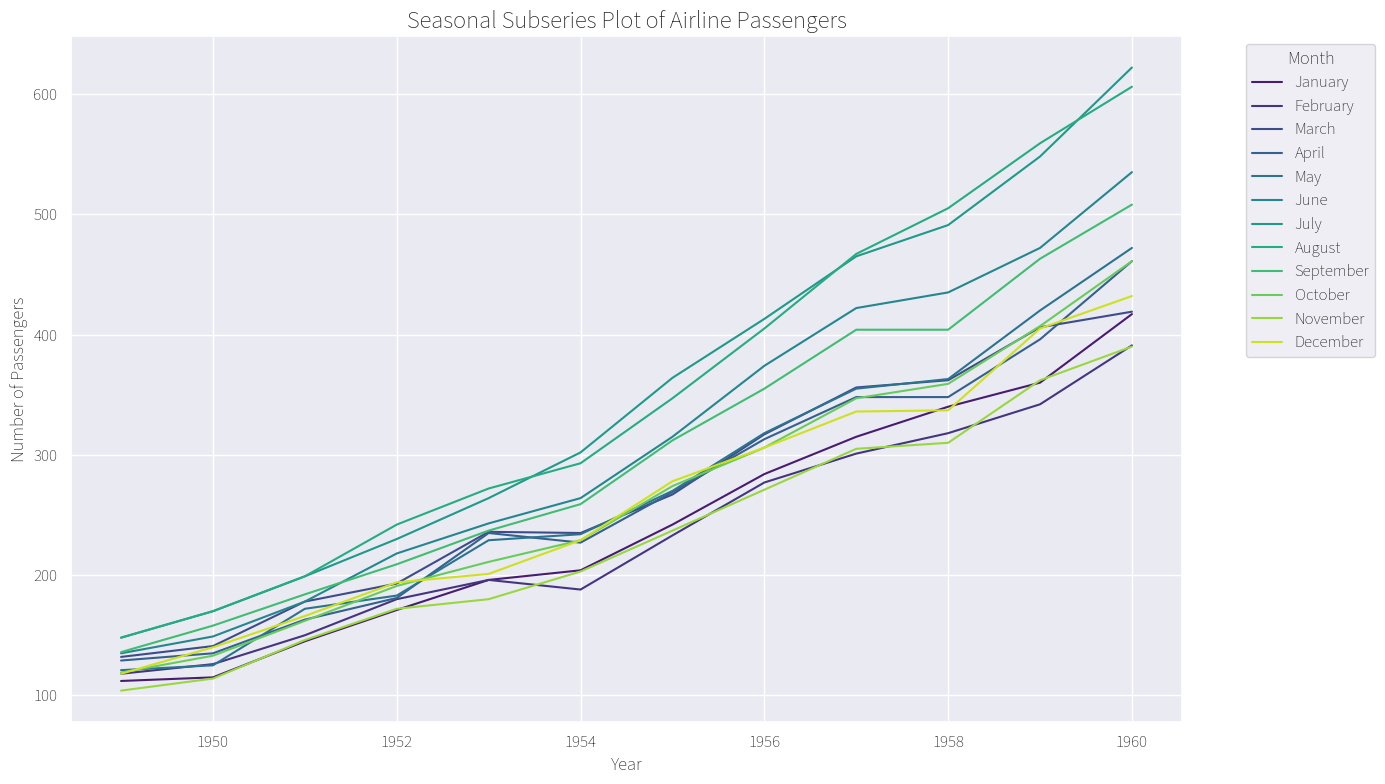

In [4]:
import seaborn as sns
# Create columns for year and month
df['Year'] = df.index.year
df['Month'] = df.index.month_name()
# Create a seasonal subseries plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Year', y='Passengers', hue='Month', palette='viridis')
plt.title('Seasonal Subseries Plot of Airline Passengers', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


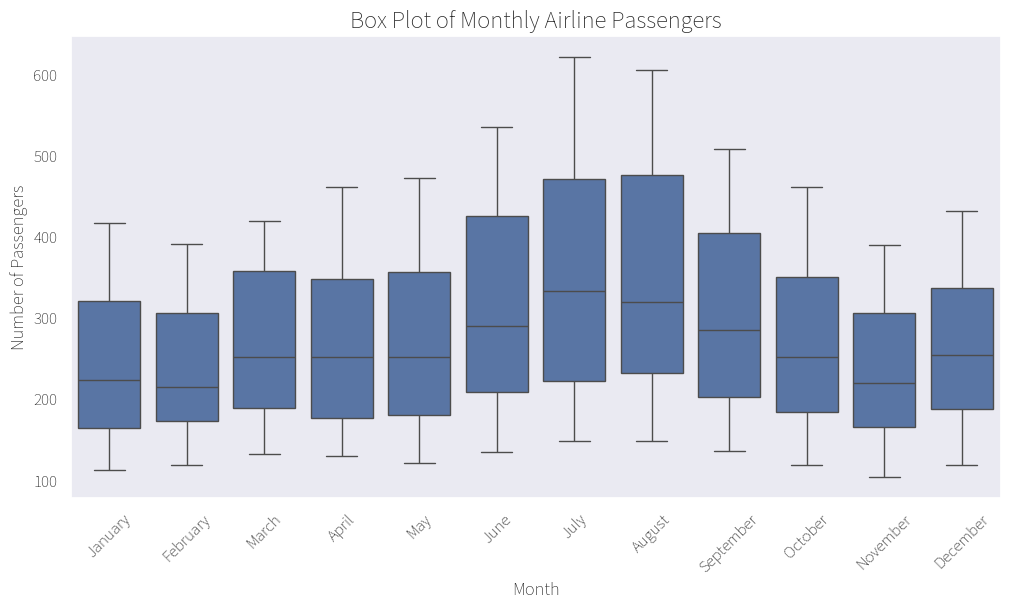

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Month', y='Passengers', order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Box Plot of Monthly Airline Passengers', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


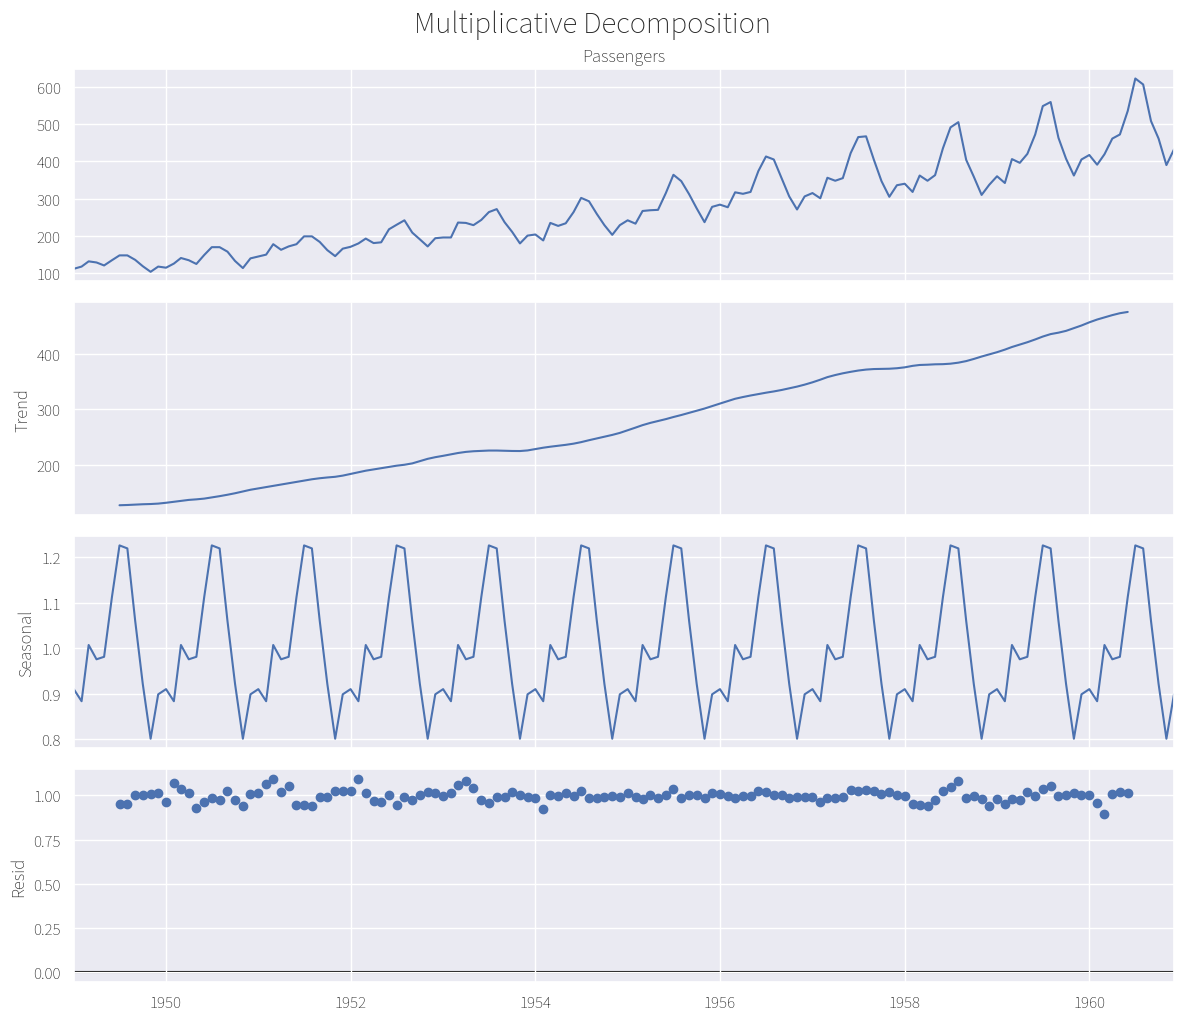

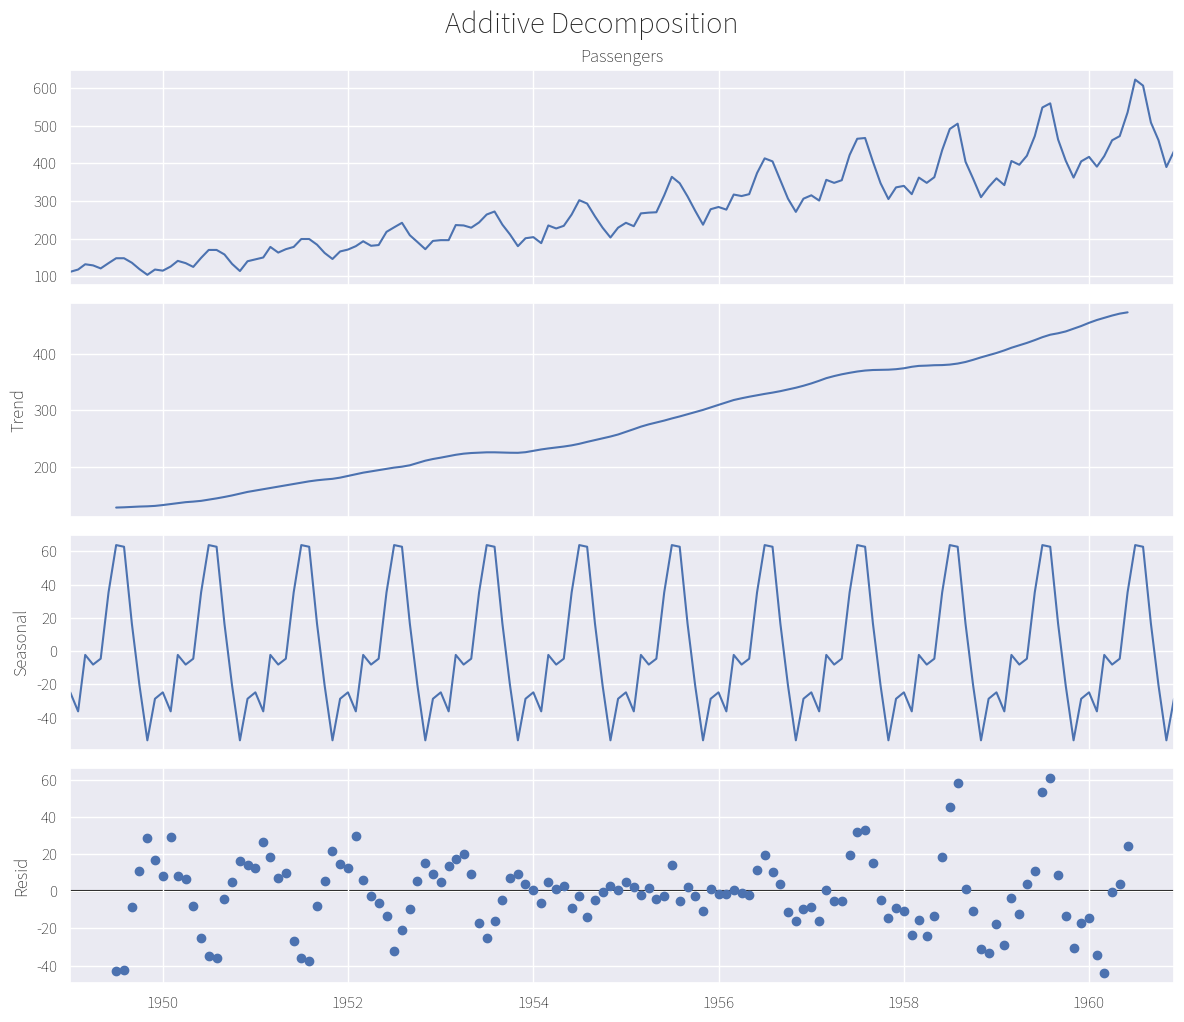

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Perform multiplicative decomposition
result_mul = seasonal_decompose(df['Passengers'], model='multiplicative')
# Perform additive decomposition
result_add = seasonal_decompose(df['Passengers'], model='additive')
# Plot the results of both decompositions
plt.rcParams.update({'figure.figsize': (12,10)})
result_mul.plot().suptitle('Multiplicative Decomposition', fontsize=20, y=1.02)
result_add.plot().suptitle('Additive Decomposition', fontsize=20, y=1.02)
plt.show()


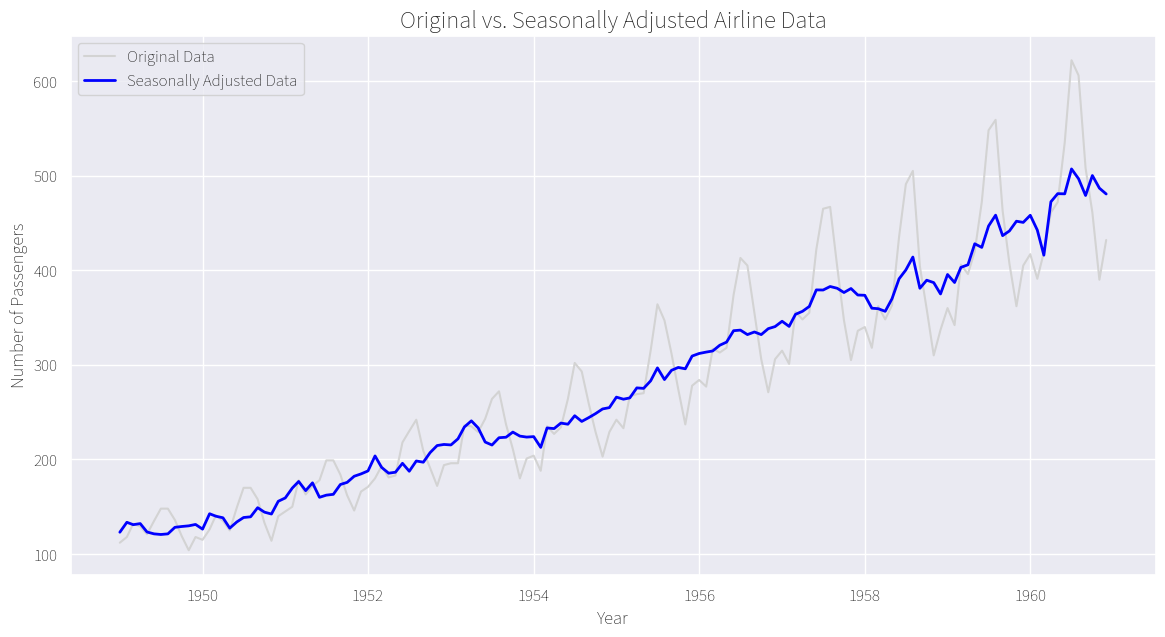

In [7]:
# Calculate and plot the seasonally adjusted series
seasonally_adjusted = df['Passengers'] / result_mul.seasonal
plt.figure(figsize=(14, 7))
plt.plot(df['Passengers'], label='Original Data', color='lightgray')
plt.plot(seasonally_adjusted, label='Seasonally Adjusted Data', color='blue', linewidth=2)
plt.title('Original vs. Seasonally Adjusted Airline Data', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


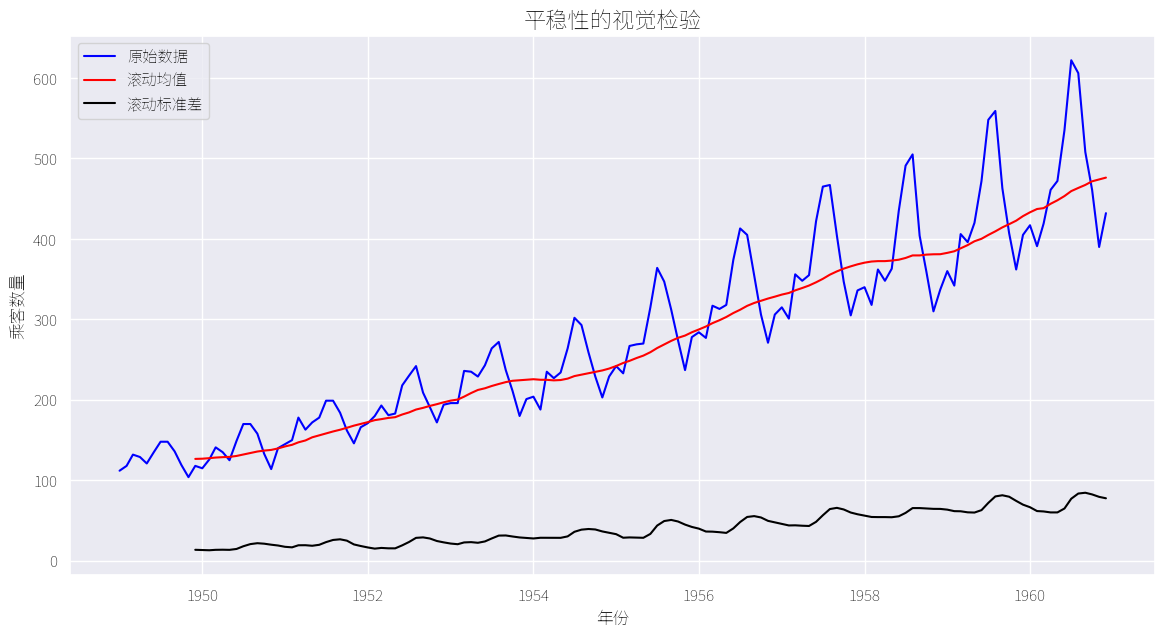

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
# 加载和准备数据
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)
df.columns = ['Passengers']
# 定义滚动窗口大小（例如12个月）
window_size = 12
# 计算滚动均值和标准差
rolling_mean = df['Passengers'].rolling(window=window_size).mean()
rolling_std = df['Passengers'].rolling(window=window_size).std()
# 绘制原始数据和滚动统计量
plt.figure(figsize=(14, 7))
plt.plot(df['Passengers'], color='blue', label='原始数据')
plt.plot(rolling_mean, color='red', label='滚动均值')
plt.plot(rolling_std, color='black', label='滚动标准差')
plt.title('平稳性的视觉检验', fontsize=16)
plt.xlabel('年份', fontsize=12)
plt.ylabel('乘客数量', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [10]:
from statsmodels.tsa.stattools import adfuller

# 对原始乘客数据执行ADF检验
result = adfuller(df['Passengers'])

# 解包结果
adf_stat, p_value, usedlag, nobs, critical_values, icbest = result

# 以可读格式打印结果
print('--- 增广迪基-福勒检验结果 ---')
print(f'ADF 统计量: {adf_stat:.4f}')
print(f'p值: {p_value:.4f}')
print(f'使用的滞后阶数: {usedlag}')
print(f'使用的观测数量: {nobs}')
print('临界值:')
for key, value in critical_values.items():
    print(f'    {key}: {value:.3f}')

# 解释结果
if p_value <= 0.05:
    print("\n结论：数据很可能是平稳的 (拒绝 H0)。")
else:
    print("\n结论：数据很可能是非平稳的 (无法拒绝 H0)。")


--- 增广迪基-福勒检验结果 ---
ADF 统计量: 0.8154
p值: 0.9919
使用的滞后阶数: 13
使用的观测数量: 130
临界值:
    1%: -3.482
    5%: -2.884
    10%: -2.579

结论：数据很可能是非平稳的 (无法拒绝 H0)。


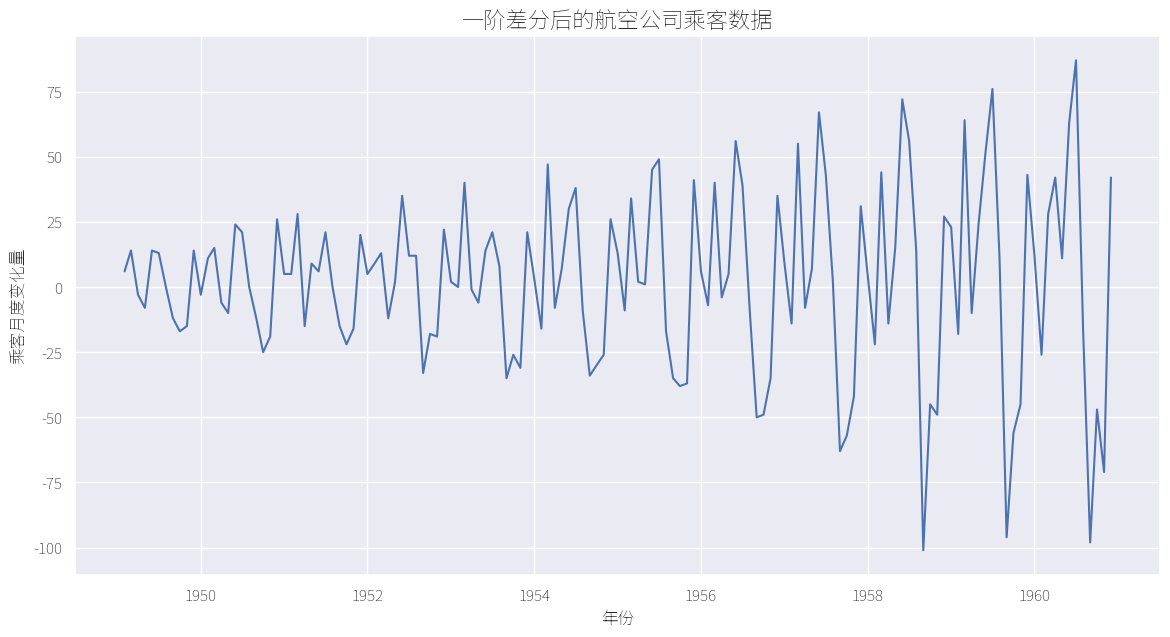


--- 对差分后数据的ADF检验 ---
ADF 统计量: -2.8293
p值: 0.0542

结论：差分后的数据仍然可能是非平稳的。


In [11]:
# 应用一阶差分
df['Passengers_diff'] = df['Passengers'].diff()

# 绘制差分后的序列
plt.figure(figsize=(14, 7))
plt.plot(df['Passengers_diff'].dropna())
plt.title('一阶差分后的航空公司乘客数据', fontsize=16)
plt.xlabel('年份', fontsize=12)
plt.ylabel('乘客月度变化量', fontsize=12)
plt.grid(True)
plt.show()

# 对差分后的序列执行ADF检验
result_diff = adfuller(df['Passengers_diff'].dropna())

# 解包结果
adf_stat, p_value, usedlag, nobs, critical_values, icbest = result_diff

print('\n--- 对差分后数据的ADF检验 ---')
print(f'ADF 统计量: {adf_stat:.4f}')
print(f'p值: {p_value:.4f}')

# 判断平稳性
if p_value <= 0.05:
    print("\n结论：差分后的数据很可能是平稳的。")
else:
    print("\n结论：差分后的数据仍然可能是非平稳的。")


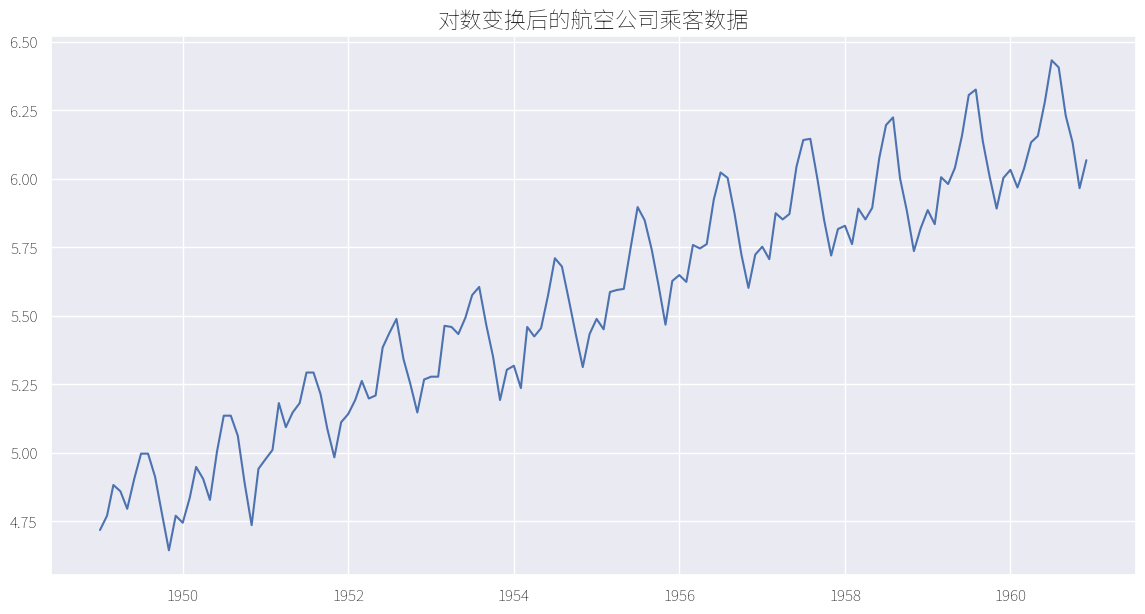

In [12]:
import numpy as np
# 应用对数变换
df['Passengers_log'] = np.log(df['Passengers'])
# 绘制对数变换后的数据
plt.figure(figsize=(14, 7))
plt.plot(df['Passengers_log'])
plt.title('对数变换后的航空公司乘客数据', fontsize=16)
plt.grid(True)
plt.show()
# 然后可以对对数变换后的数据进行差分
df['Passengers_log_diff'] = df['Passengers_log'].diff().dropna()


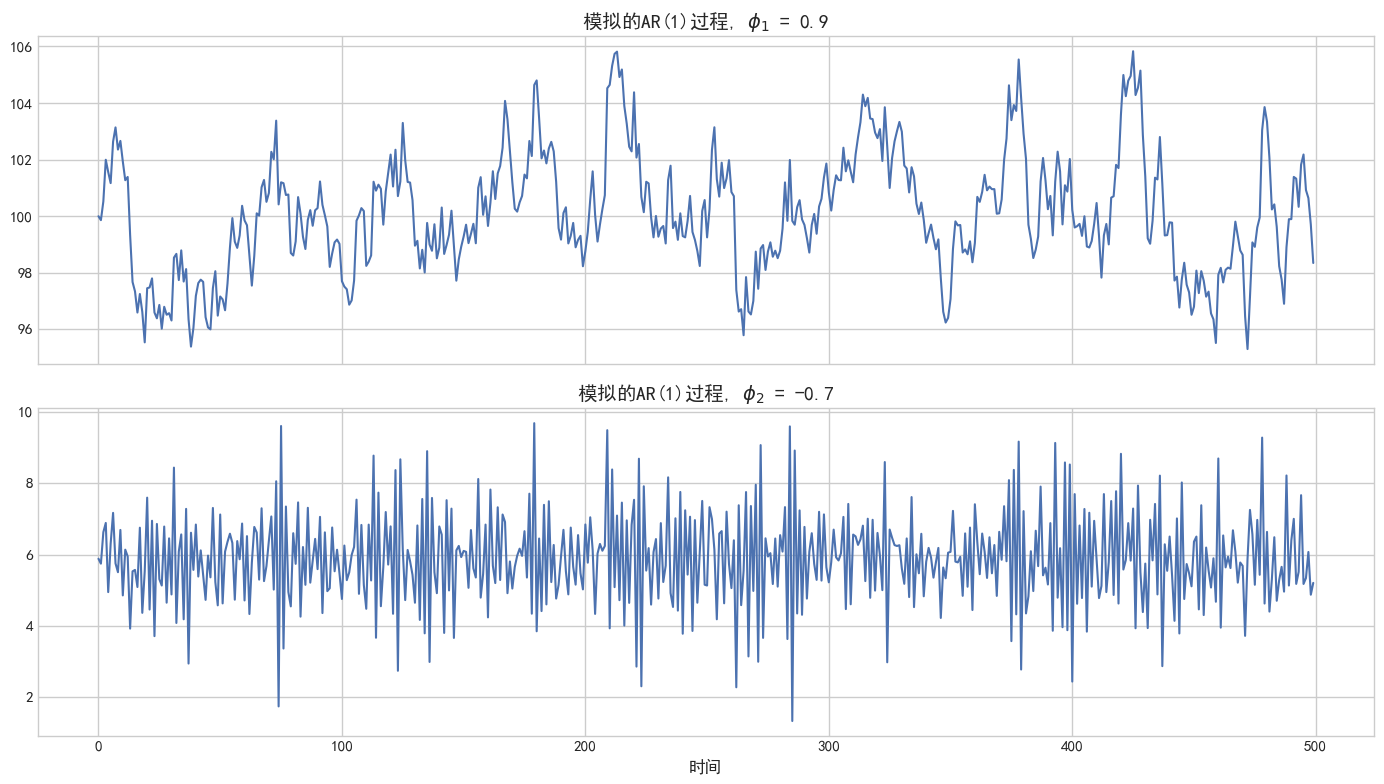

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# 设置模拟参数
np.random.seed(42)
n_samples = 500
phi_1 = 0.9   # 一个强的正AR系数
phi_2 = -0.7  # 一个均值回归的AR系数
c = 10
epsilon = np.random.normal(0, 1, n_samples)

# 模拟 phi = 0.9 的 AR(1) 过程
ar_process_1 = np.zeros(n_samples)
ar_process_1[0] = c / (1 - phi_1)   # 只设置初值，不要覆盖整个数组
for t in range(1, n_samples):
    ar_process_1[t] = c + phi_1 * ar_process_1[t-1] + epsilon[t]

# 模拟 phi = -0.7 的 AR(1) 过程
ar_process_2 = np.zeros(n_samples)
ar_process_2[0] = c / (1 - phi_2)   # 只设置初值
for t in range(1, n_samples):
    ar_process_2[t] = c + phi_2 * ar_process_2[t-1] + epsilon[t]

# 绘制模拟过程
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

ax1.plot(ar_process_1)
ax1.set_title(f'模拟的AR(1)过程, $\\phi_1$ = {phi_1}', fontsize=14)
ax1.grid(True)

ax2.plot(ar_process_2)
ax2.set_title(f'模拟的AR(1)过程, $\\phi_2$ = {phi_2}', fontsize=14)
ax2.grid(True)

plt.xlabel('时间')
plt.tight_layout()
plt.show()


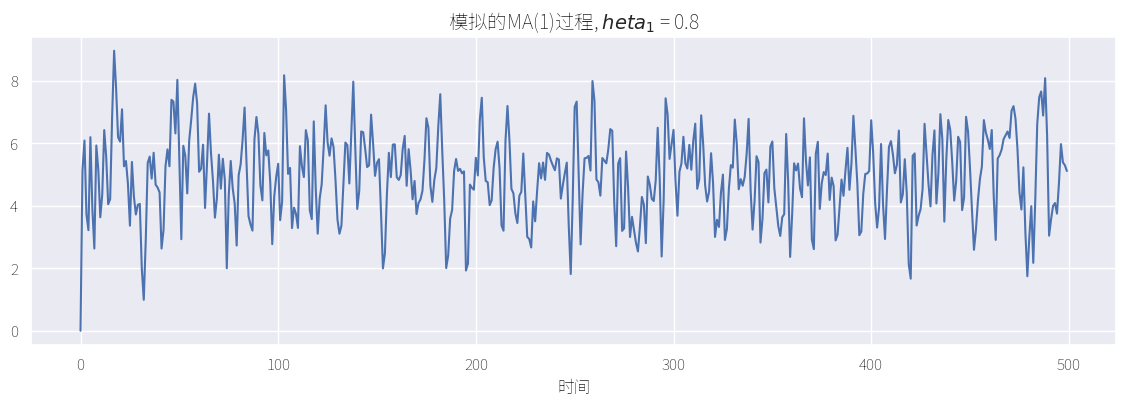

In [14]:
# 设置模拟参数
np.random.seed(123)
n_samples = 500
theta_1 = 0.8 # 一个正的MA系数
c = 5
epsilon = np.random.normal(0, 1, n_samples)
# 模拟一个MA(1)过程
ma_process = np.zeros(n_samples)
for t in range(1, n_samples):
    ma_process[t] = c + epsilon[t] + theta_1 * epsilon[t-1]
# 绘制模拟过程
plt.figure(figsize=(14, 4))
plt.plot(ma_process)
plt.title(f'模拟的MA(1)过程, $\theta_1$ = {theta_1}', fontsize=14)
plt.grid(True)
plt.xlabel('时间')
plt.show()


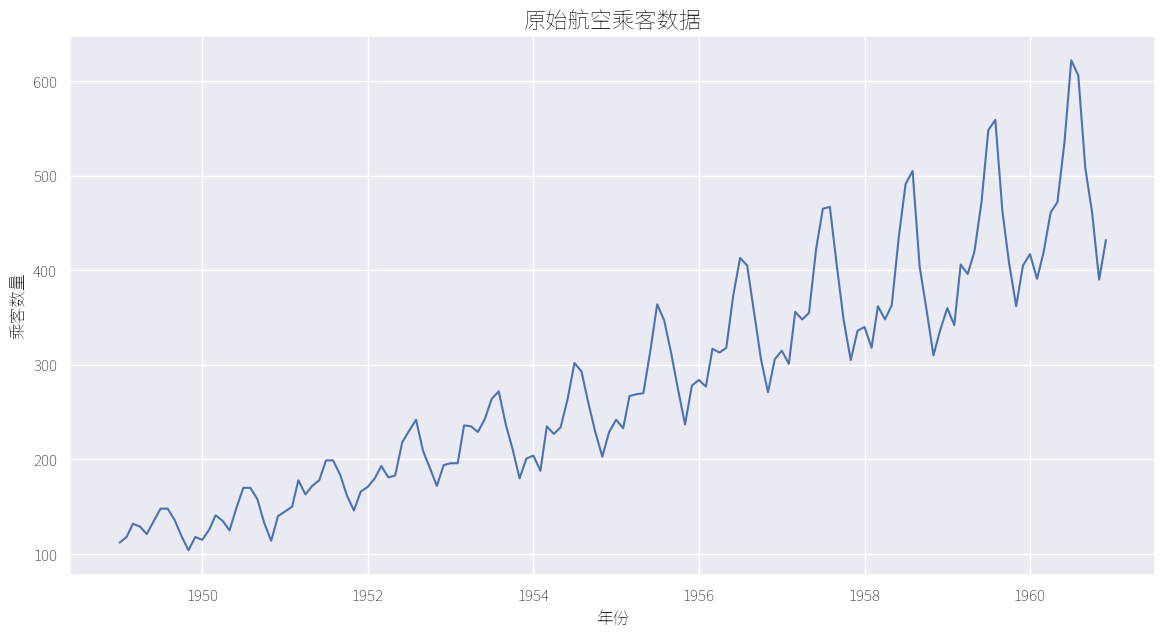

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
# 加载数据集
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)
df.columns = ['Passengers']
# 绘制原始数据
plt.figure(figsize=(14, 7))
plt.plot(df['Passengers'])
plt.title('原始航空乘客数据', fontsize=16)
plt.xlabel('年份', fontsize=12)
plt.ylabel('乘客数量', fontsize=12)
plt.grid(True)
plt.show()


In [16]:
from statsmodels.tsa.stattools import adfuller

# 对原始数据执行ADF检验
result_raw = adfuller(df['Passengers'])

# 解包结果
adf_stat, p_value, usedlag, nobs, critical_values, icbest = result_raw

print(f'原始数据 ADF 统计量: {adf_stat:.4f}')
print(f'原始数据 p值: {p_value:.4f}')


原始数据 ADF 统计量: 0.8154
原始数据 p值: 0.9919


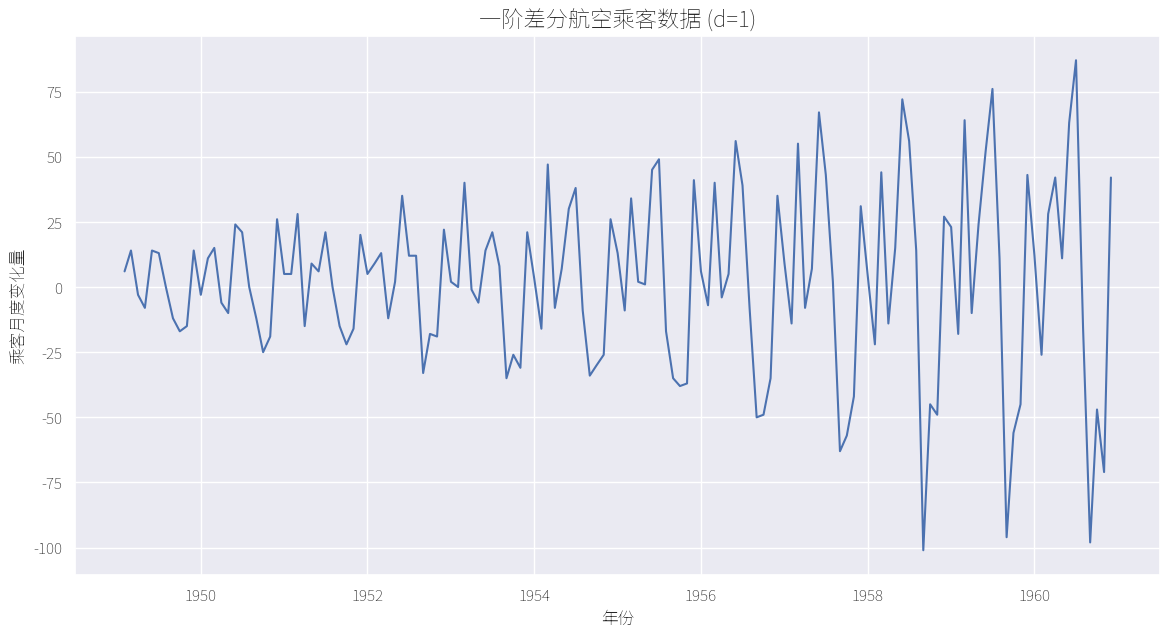

d=1时 ADF 统计量: -2.8293
d=1时 p值: 0.0542


In [17]:
# 应用一阶差分
df['Passengers_diff1'] = df['Passengers'].diff()

# 绘制一阶差分数据
plt.figure(figsize=(14, 7))
plt.plot(df['Passengers_diff1'])
plt.title('一阶差分航空乘客数据 (d=1)', fontsize=16)
plt.xlabel('年份', fontsize=12)
plt.ylabel('乘客月度变化量', fontsize=12)
plt.grid(True)
plt.show()

# 对一阶差分数据执行ADF检验
result_diff1 = adfuller(df['Passengers_diff1'].dropna())

# 解包结果
adf_stat, p_value, usedlag, nobs, critical_values, icbest = result_diff1

print(f'd=1时 ADF 统计量: {adf_stat:.4f}')
print(f'd=1时 p值: {p_value:.4f}')


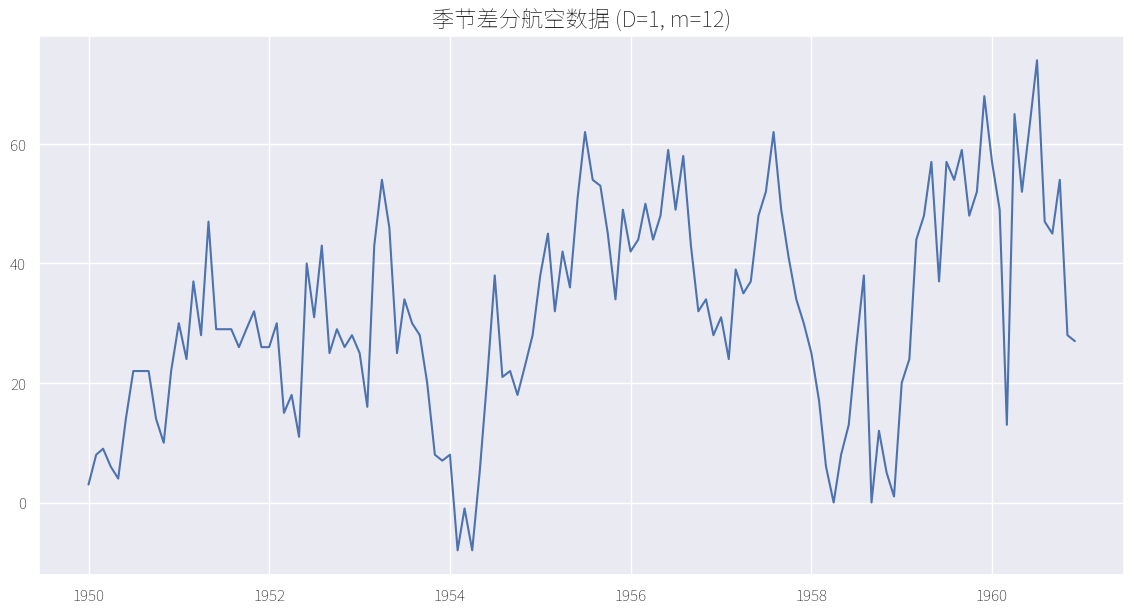

D=1 时 ADF 统计量: -3.3830
D=1 时 p值: 0.0116


In [18]:
# 应用季节差分（D=1, m=12）
df['Passengers_seasonal_diff1'] = df['Passengers'].diff(12)

# 绘制季节差分数据
plt.figure(figsize=(14, 7))
plt.plot(df['Passengers_seasonal_diff1'])
plt.title('季节差分航空数据 (D=1, m=12)', fontsize=16)
plt.grid(True)
plt.show()

# 对季节差分数据执行ADF检验
result_seasonal_diff1 = adfuller(df['Passengers_seasonal_diff1'].dropna())

# 解包结果
adf_stat, p_value, usedlag, nobs, critical_values, icbest = result_seasonal_diff1

print(f'D=1 时 ADF 统计量: {adf_stat:.4f}')
print(f'D=1 时 p值: {p_value:.4f}')


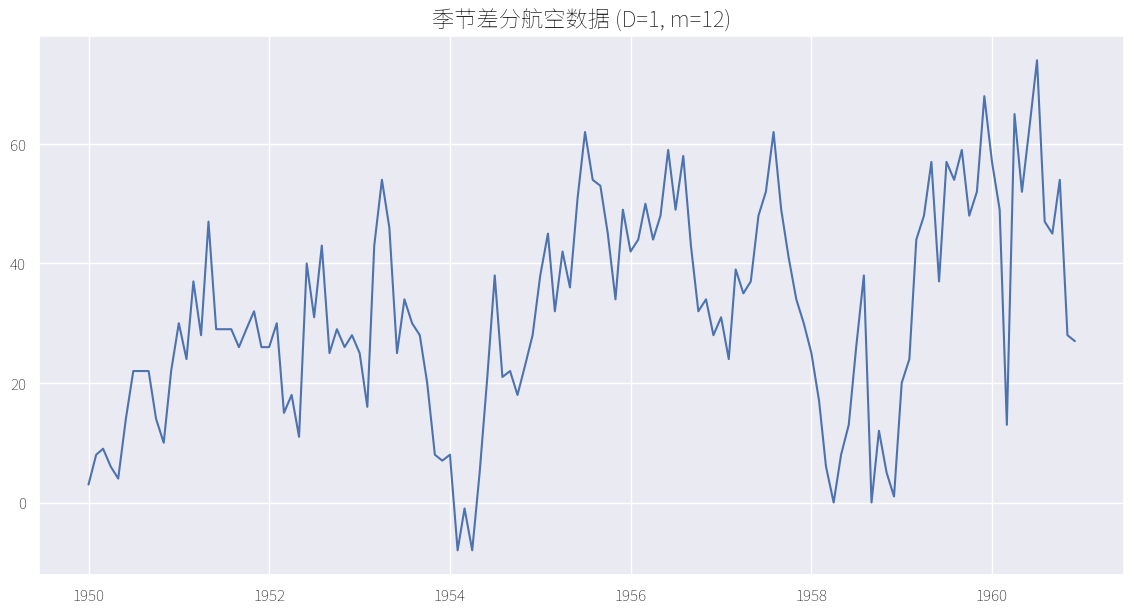

D=1 时 ADF 统计量: -3.3830
D=1 时 p值: 0.0116


In [19]:
# 应用季节差分（D=1, m=12）
df['Passengers_seasonal_diff1'] = df['Passengers'].diff(12)

# 绘制季节差分数据
plt.figure(figsize=(14, 7))
plt.plot(df['Passengers_seasonal_diff1'])
plt.title('季节差分航空数据 (D=1, m=12)', fontsize=16)
plt.grid(True)
plt.show()

# 对季节差分数据执行ADF检验
result_seasonal_diff1 = adfuller(df['Passengers_seasonal_diff1'].dropna())

# 解包结果
adf_stat, p_value, usedlag, nobs, critical_values, icbest = result_seasonal_diff1

print(f'D=1 时 ADF 统计量: {adf_stat:.4f}')
print(f'D=1 时 p值: {p_value:.4f}')


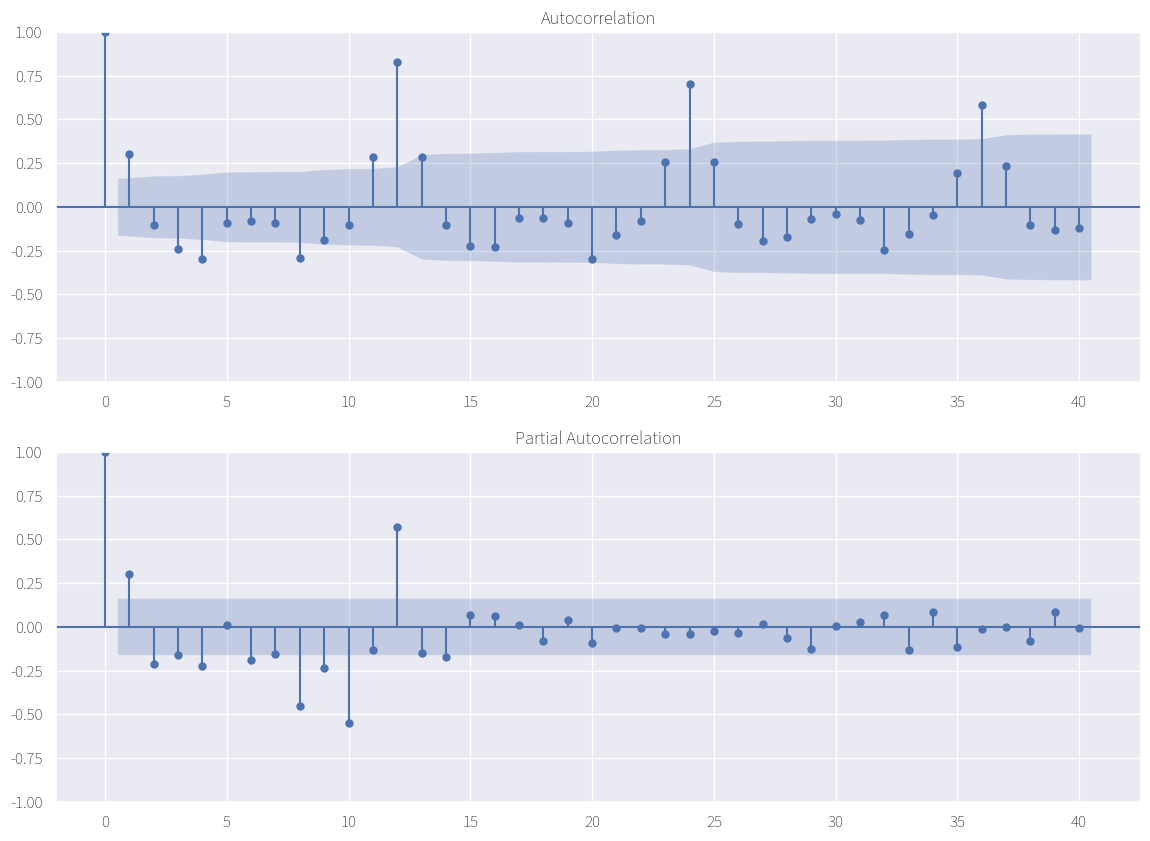

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# 生成ACF与PACF图
df['Passengers_final_diff'] = df['Passengers'].diff()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
plot_acf(df['Passengers_final_diff'].dropna(), ax=ax1, lags=40)
plot_pacf(df['Passengers_final_diff'].dropna(), ax=ax2, lags=40)
plt.show()


In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# 定义模型及其阶数
model = SARIMAX(df['Passengers'],
                order=(0, 1, 1),
                seasonal_order=(0, 1, 1, 12))
# 拟合模型
model_fit = model.fit(disp=False)
# 输出模型摘要
print(model_fit.summary())


                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -507.501
Date:                            Thu, 27 Nov 2025   AIC                           1021.003
Time:                                    11:38:53   BIC                           1029.628
Sample:                                01-01-1949   HQIC                          1024.507
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3087      0.068     -4.507      0.000      -0.443      -0.174
ma.S.L12      -0.1075      0.091   

D:\Study\deeplearning\Anaconda3\envs\bookcode\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Study\deeplearning\Anaconda3\envs\bookcode\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


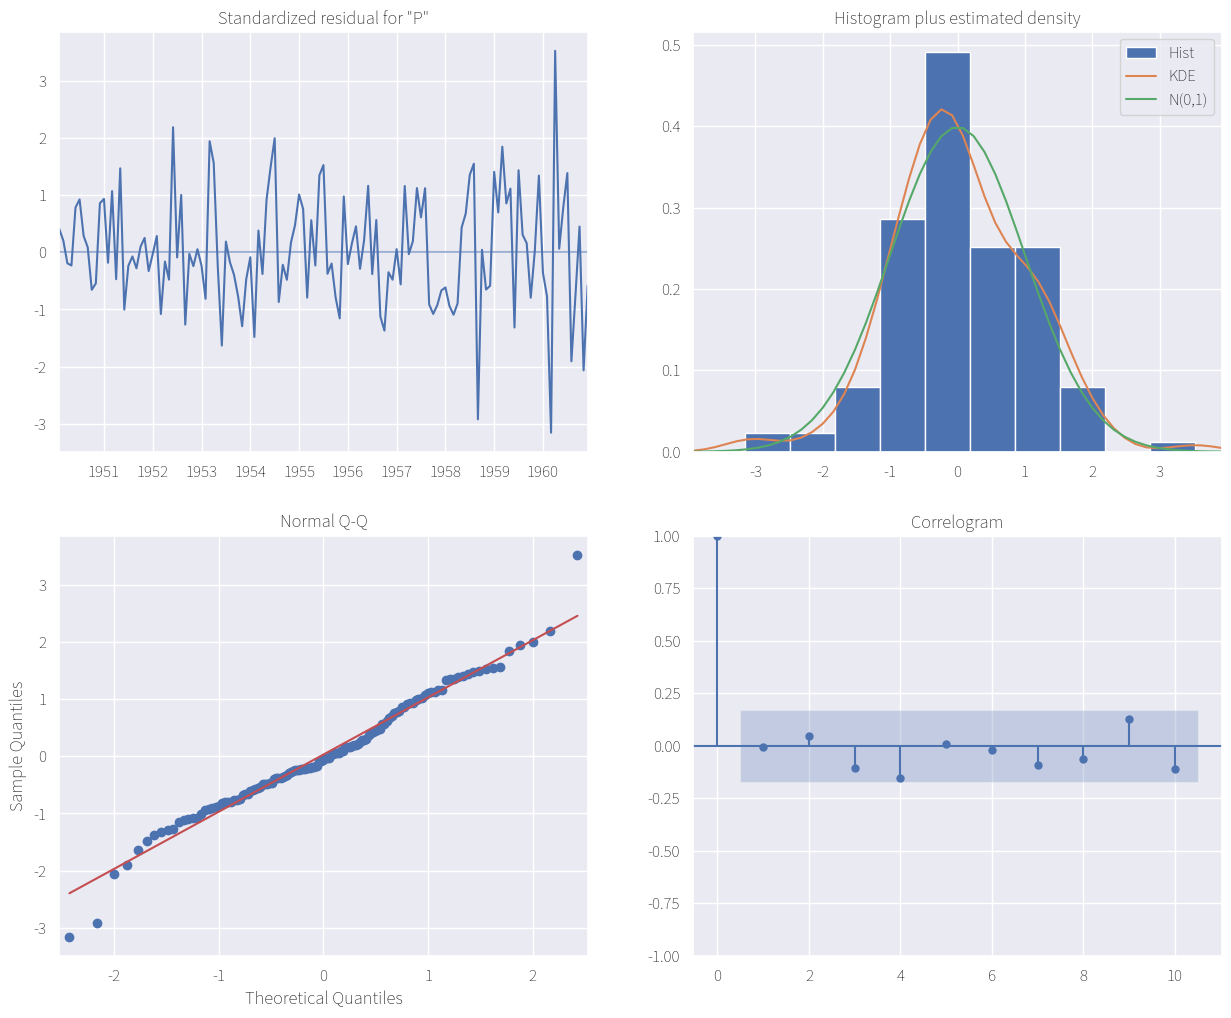

In [27]:
# 绘制拟合模型的诊断图
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()


In [28]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# 对残差执行 Ljung-Box 检验，常用 10 或 20 阶
lb_test = acorr_ljungbox(model_fit.resid, lags=[10], return_df=True)
print(lb_test)


     lb_stat  lb_pvalue
10  6.704048   0.753058


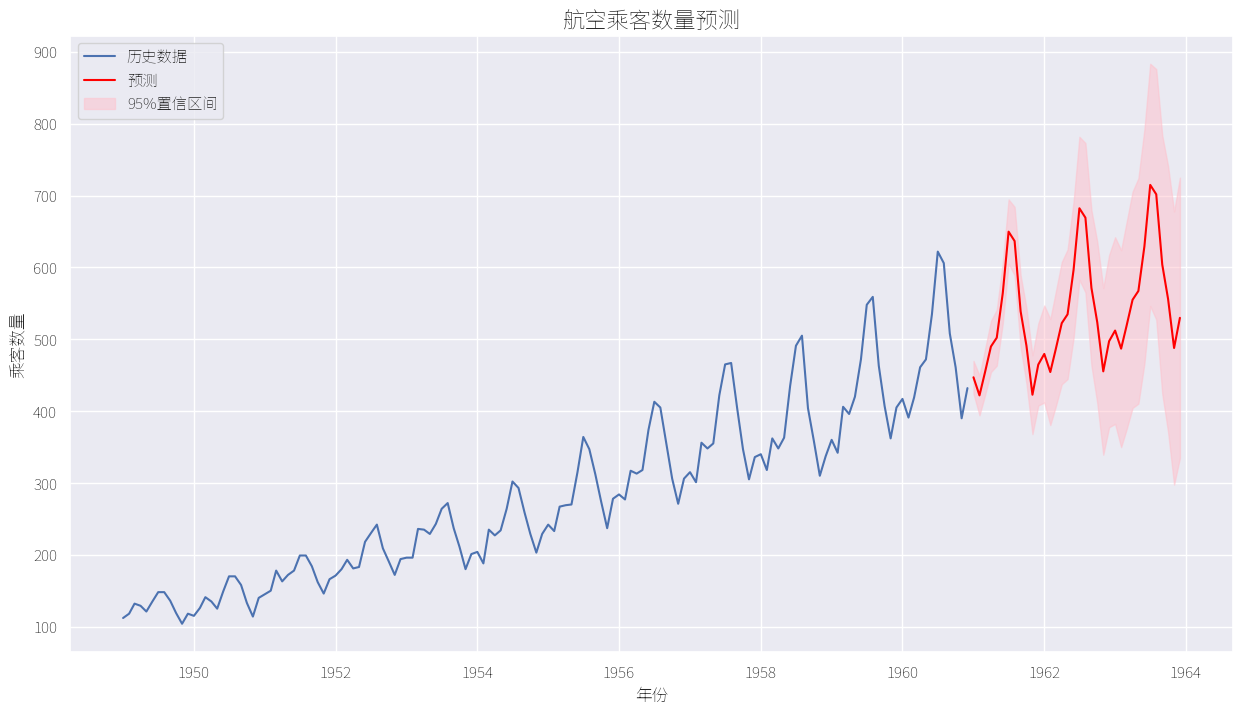

In [29]:
# 预测未来36个月（3年）
n_steps = 36
forecast = model_fit.get_forecast(steps=n_steps)
# 获取点预测及置信区间
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
# 绘制历史数据和预测结果
plt.figure(figsize=(15, 8))
plt.plot(df['Passengers'], label='历史数据')
plt.plot(forecast_mean, label='预测', color='red')
plt.fill_between(confidence_intervals.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='pink', alpha=0.5, label='95%置信区间')
plt.title('航空乘客数量预测', fontsize=16)
plt.xlabel('年份', fontsize=12)
plt.ylabel('乘客数量', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [30]:
import pandas as pd
import numpy as np

# 本地读取
df = pd.read_csv("air_passengers.csv", header=0, index_col=0, parse_dates=True)
df.columns = ['Passengers']

def create_supervised_dataset(data, n_lags=1):
    df_temp = pd.DataFrame(data)
    columns = [df_temp.shift(i) for i in range(1, n_lags + 1)]
    columns.append(df_temp)
    df_temp = pd.concat(columns, axis=1)
    df_temp.columns = [f'lag_{i}' for i in range(n_lags, 0, -1)] + ['target']
    df_temp.dropna(inplace=True)
    return df_temp

n_lags = 12
supervised_df = create_supervised_dataset(df['Passengers'], n_lags=n_lags)
print(supervised_df.head())


            lag_12  lag_11  lag_10  lag_9  lag_8  lag_7  lag_6  lag_5  lag_4  \
Month                                                                          
1950-01-01   118.0   104.0   119.0  136.0  148.0  148.0  135.0  121.0  129.0   
1950-02-01   115.0   118.0   104.0  119.0  136.0  148.0  148.0  135.0  121.0   
1950-03-01   126.0   115.0   118.0  104.0  119.0  136.0  148.0  148.0  135.0   
1950-04-01   141.0   126.0   115.0  118.0  104.0  119.0  136.0  148.0  148.0   
1950-05-01   135.0   141.0   126.0  115.0  118.0  104.0  119.0  136.0  148.0   

            lag_3  lag_2  lag_1  target  
Month                                    
1950-01-01  132.0  118.0  112.0     115  
1950-02-01  129.0  132.0  118.0     126  
1950-03-01  121.0  129.0  132.0     141  
1950-04-01  135.0  121.0  129.0     135  
1950-05-01  148.0  135.0  121.0     125  


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# 本地读取数据
df = pd.read_csv("air_passengers.csv", header=0, index_col=0, parse_dates=True)
dataset = df['Passengers'].values.reshape(-1, 1)

# 归一化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(dataset)

# 创建序列函数
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:(i + n_steps), 0])
        y.append(data[i + n_steps, 0])
    return np.array(X), np.array(y)

n_steps = 12
X, y = create_sequences(scaled_dataset, n_steps)

# 转换为 PyTorch 张量
X = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)  # (样本数, 时间步, 特征数)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)  # (样本数, 1)

print("X shape:", X.shape)
print("y shape:", y.shape)

# 建立 DataLoader
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# 定义 LSTM 模型
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=1, output_size=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out, _ = self.lstm(x)   # out: (batch, seq_len, hidden_size)
        out = out[:, -1, :]     # 取最后时间步
        out = self.fc(out)
        return out

# 初始化模型
model = LSTMModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 训练
epochs = 20
for epoch in range(epochs):
    for batch_X, batch_y in dataloader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.6f}")


X shape: torch.Size([132, 12, 1])
y shape: torch.Size([132, 1])
Epoch 1/20, Loss: 0.103036
Epoch 2/20, Loss: 0.079525
Epoch 3/20, Loss: 0.067373
Epoch 4/20, Loss: 0.030645
Epoch 5/20, Loss: 0.016872
Epoch 6/20, Loss: 0.024450
Epoch 7/20, Loss: 0.008068
Epoch 8/20, Loss: 0.015567
Epoch 9/20, Loss: 0.040888
Epoch 10/20, Loss: 0.004713
Epoch 11/20, Loss: 0.007551
Epoch 12/20, Loss: 0.037092
Epoch 13/20, Loss: 0.005790
Epoch 14/20, Loss: 0.022549
Epoch 15/20, Loss: 0.024363
Epoch 16/20, Loss: 0.004962
Epoch 17/20, Loss: 0.001472
Epoch 18/20, Loss: 0.000654
Epoch 19/20, Loss: 0.004090
Epoch 20/20, Loss: 0.010188


In [32]:
import torch
import torch.nn as nn
import torch.optim as optim

# 定义 PyTorch LSTM 模型 (等价于 Keras Sequential + LSTM + Dense)
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=1, output_size=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)       # out: (batch, seq_len, hidden_size)
        out = out[:, -1, :]         # 取最后时间步 (相当于 return_sequences=False)
        out = self.fc(out)          # Dense(units=1)
        return out

# 初始化模型
model = LSTMModel(input_size=1, hidden_size=50, num_layers=1, output_size=1)

# 定义损失函数和优化器 (等价于 compile)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练循环 (等价于 fit)
epochs = 100
batch_size = 1
for epoch in range(epochs):
    epoch_loss = 0.0
    for i in range(0, len(X), batch_size):
        batch_X = X[i:i+batch_size]
        batch_y = y[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    # 这里相当于 verbose=0，只在需要时打印
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(X):.6f}")


Epoch 10/100, Loss: 0.008272
Epoch 20/100, Loss: 0.003653
Epoch 30/100, Loss: 0.002318
Epoch 40/100, Loss: 0.001581
Epoch 50/100, Loss: 0.001485
Epoch 60/100, Loss: 0.001474
Epoch 70/100, Loss: 0.001512
Epoch 80/100, Loss: 0.001609
Epoch 90/100, Loss: 0.001518
Epoch 100/100, Loss: 0.001740


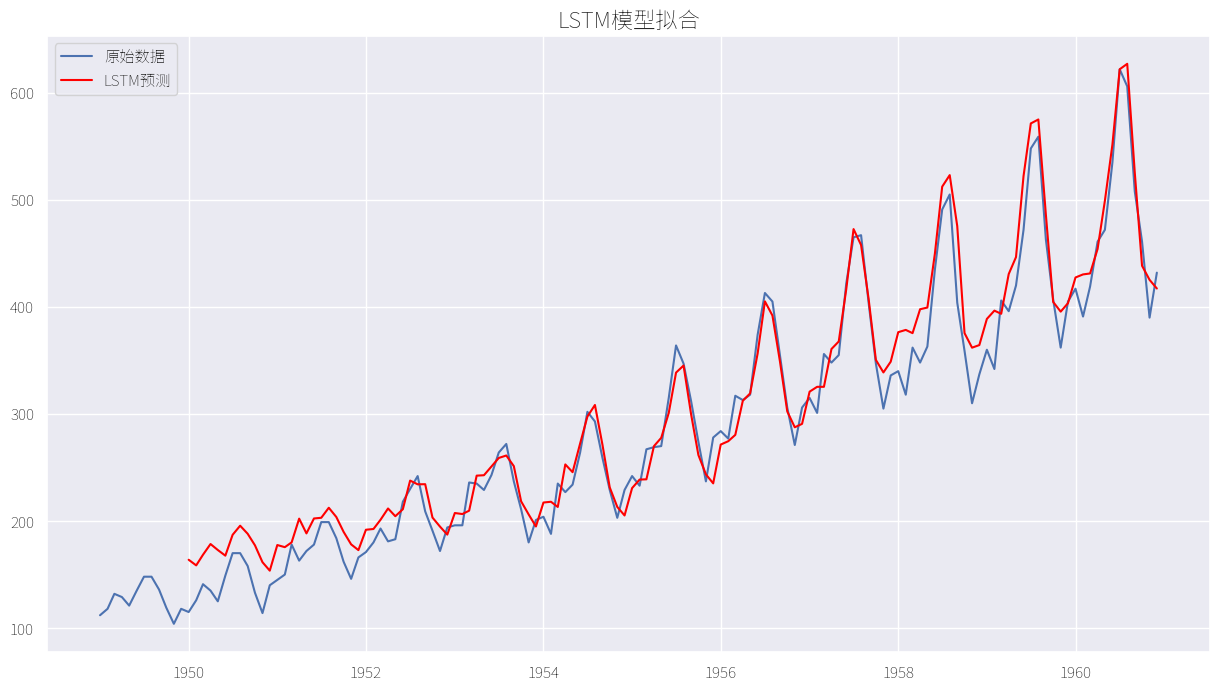

In [33]:
# 本地读取数据
df = pd.read_csv("air_passengers.csv", header=0, index_col=0, parse_dates=True)

# 保存原始乘客序列
values = df['Passengers'].values.reshape(-1, 1)

# 归一化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

# 创建序列函数
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:(i + n_steps), 0])
        y.append(data[i + n_steps, 0])
    return np.array(X), np.array(y)

n_steps = 12
X, y = create_sequences(scaled_dataset, n_steps)

# 转换为 PyTorch 张量
X = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)  # (样本数, 时间步, 特征数)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)  # (样本数, 1)

# 建立 DataLoader
dataset = TensorDataset(X, y)   # 不会再覆盖 values
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# ===================
# 预测 + 可视化
# ===================
model.eval()
with torch.no_grad():
    train_predict = model(X)

train_predict = train_predict.detach().cpu().numpy().reshape(-1, 1)
y_original = y.detach().cpu().numpy().reshape(-1, 1)

train_predict = scaler.inverse_transform(train_predict)
y_original = scaler.inverse_transform(y_original)

plt.figure(figsize=(15, 8))
plt.plot(df.index, values.reshape(-1), label='原始数据')  # 用 values 而不是 dataset
plt.plot(df.index[n_steps:], train_predict.reshape(-1), label='LSTM预测', color='red')
plt.title('LSTM模型拟合', fontsize=16)
plt.legend()
plt.show()


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 7)
file_path = "retail_sales_dataset.csv"
raw_df = pd.read_csv(file_path)
print(raw_df.info())
print("\n数据显示前5行:")
print(raw_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None

数据显示前5行:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023

In [37]:
raw_df['Date'] = pd.to_datetime(raw_df['Date'])
daily_sales = raw_df.groupby('Date')['Total Amount'].sum().reset_index()
daily_sales.set_index('Date', inplace=True)
daily_sales.columns = ['Sales']
daily_sales = daily_sales.asfreq('D', fill_value=0)
print("\n按日汇总的销售时间序列:")
print(daily_sales.head())



按日汇总的销售时间序列:
            Sales
Date             
2023-01-01   3600
2023-01-02   1765
2023-01-03    600
2023-01-04   1240
2023-01-05   1100


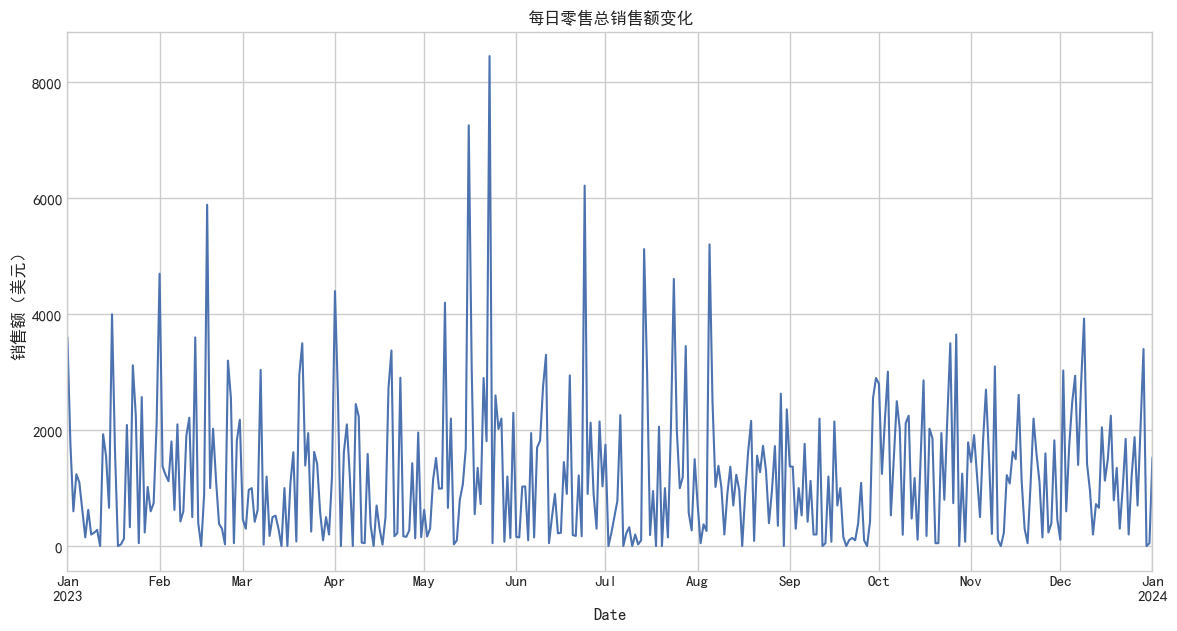

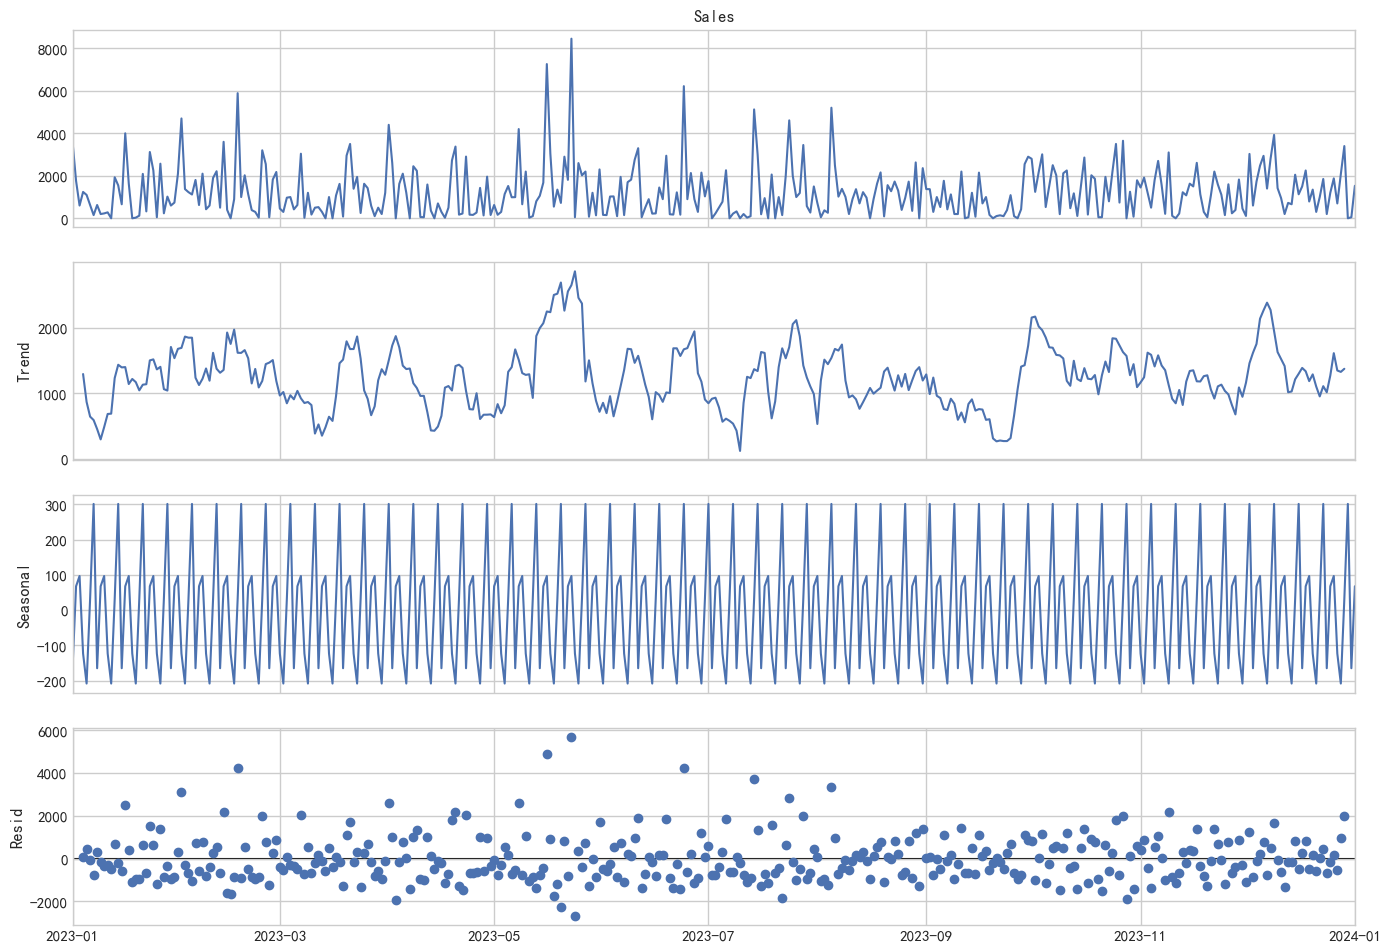

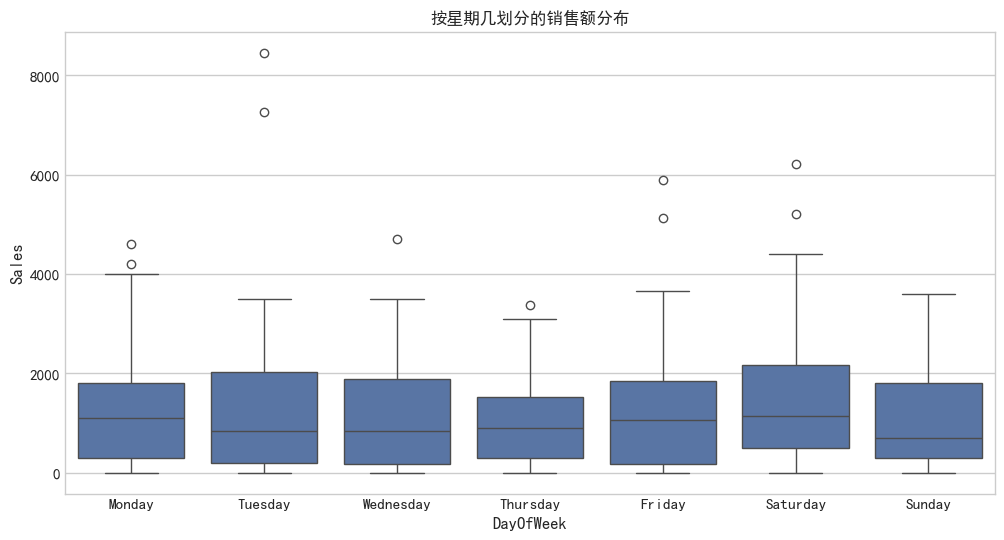

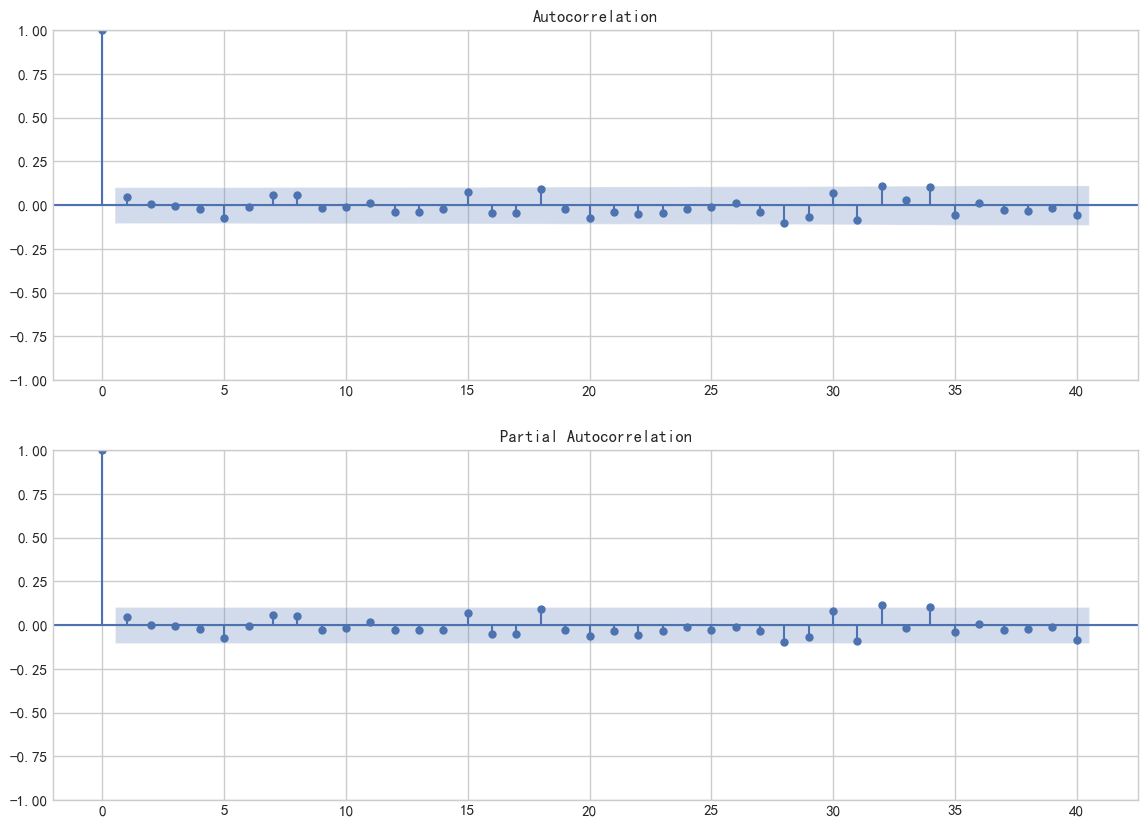

In [39]:
daily_sales['Sales'].plot(title='每日零售总销售额变化')
plt.ylabel('销售额（美元）')
plt.show()
decomposition = seasonal_decompose(daily_sales['Sales'], model='additive', period=7)
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()
daily_sales['DayOfWeek'] = daily_sales.index.day_name()
daily_sales['Month'] = daily_sales.index.month_name()
plt.figure(figsize=(12, 6))
sns.boxplot(x='DayOfWeek', y='Sales', data=daily_sales,
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('按星期几划分的销售额分布')
plt.show()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
plot_acf(daily_sales['Sales'], ax=ax1, lags=40)
plot_pacf(daily_sales['Sales'], ax=ax2, lags=40)
plt.show()


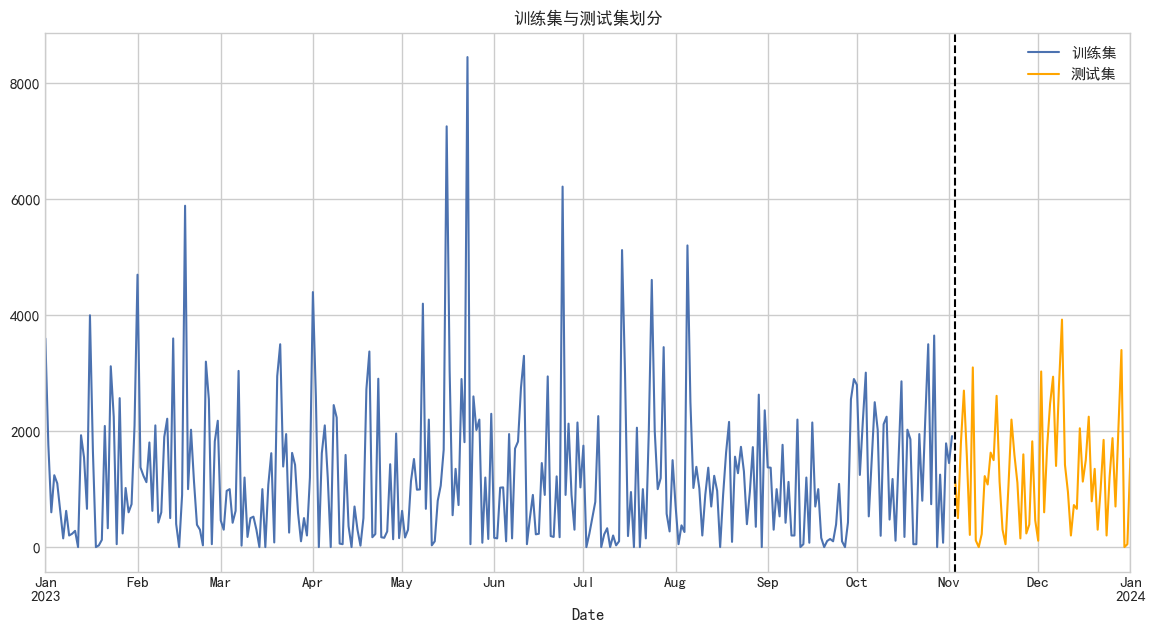

In [40]:
split_date = daily_sales.index[-60]
train_df = daily_sales.loc[daily_sales.index < split_date]
test_df = daily_sales.loc[daily_sales.index >= split_date]
fig, ax = plt.subplots()
train_df['Sales'].plot(ax=ax, label='训练集')
test_df['Sales'].plot(ax=ax, label='测试集', color='orange')
ax.axvline(split_date, color='black', ls='--')
plt.legend()
plt.title('训练集与测试集划分')
plt.show()


                                     SARIMAX Results                                     
Dep. Variable:                             Sales   No. Observations:                  306
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 7)   Log Likelihood               -2619.535
Date:                           Thu, 27 Nov 2025   AIC                           5245.070
Time:                                   11:48:55   BIC                           5256.172
Sample:                               01-01-2023   HQIC                          5249.514
                                    - 11-02-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0180      0.062      0.289      0.772      -0.104       0.140
ar.S.L7       -0.4615      0.044    -10.378

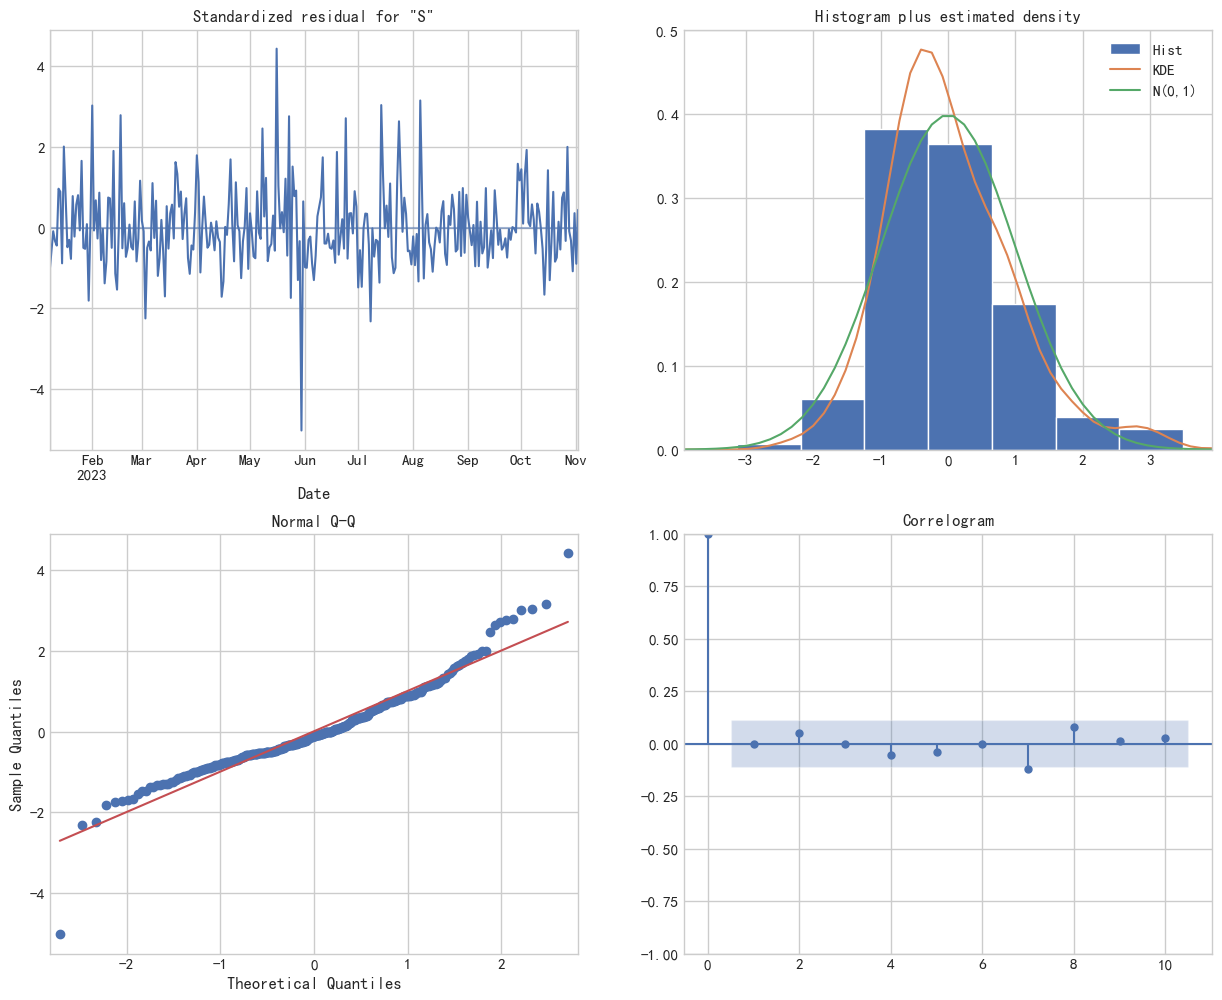

In [41]:
sarima_model = SARIMAX(train_df['Sales'],
                       order=(1, 0, 0),
                       seasonal_order=(1, 1, 0, 7))
sarima_fit = sarima_model.fit(disp=False)
print(sarima_fit.summary())
sarima_fit.plot_diagnostics(figsize=(15, 12))
plt.show()


In [42]:
def create_features(df):
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.isocalendar().week.astype(int)
    return df
sales_with_features = create_features(daily_sales)
def add_lags(df):
    target_map = df['Sales'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta(days=1)).map(target_map)
    df['lag7'] = (df.index - pd.Timedelta(days=7)).map(target_map)
    df['lag14'] = (df.index - pd.Timedelta(days=14)).map(target_map)
    return df
sales_with_features = add_lags(sales_with_features)
train_features = sales_with_features.loc[sales_with_features.index < split_date]
test_features = sales_with_features.loc[sales_with_features.index >= split_date]
FEATURES = ['dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'weekofyear', 'lag1', 'lag7', 'lag14']
TARGET = 'Sales'
X_train = train_features[FEATURES]
y_train = train_features[TARGET]
X_test = test_features[FEATURES]
y_test = test_features[TARGET]


In [43]:
xgb_model = xgb.XGBRegressor(n_estimators=1000,
                             early_stopping_rounds=50,
                             objective='reg:squarederror',
                             eval_metric='rmse')
xgb_model.fit(X_train, y_train,
              eval_set=[(X_train, y_train), (X_test, y_test)],
              verbose=False)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

SARIMA模型 --> RMSE: 1270.23, MAE: 973.80
XGBoost模型 --> RMSE: 957.72, MAE: 780.99


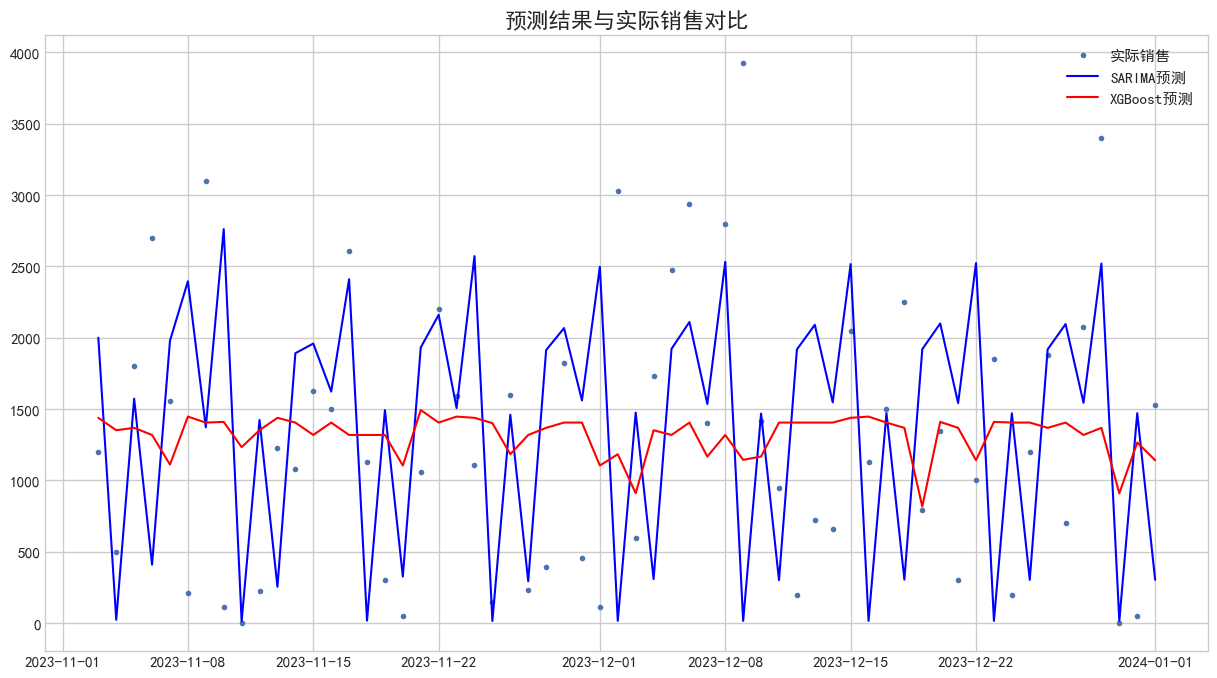

In [44]:
sarima_forecast = sarima_fit.get_forecast(steps=len(test_df))
sarima_pred = sarima_forecast.predicted_mean
sarima_pred.index = test_df.index
xgb_pred = xgb_model.predict(X_test)
xgb_pred = pd.Series(xgb_pred, index=test_df.index)
def calculate_metrics(true, pred):
    rmse = np.sqrt(mean_squared_error(true, pred))
    mae = mean_absolute_error(true, pred)
    return rmse, mae
sarima_rmse, sarima_mae = calculate_metrics(y_test, sarima_pred)
print(f'SARIMA模型 --> RMSE: {sarima_rmse:.2f}, MAE: {sarima_mae:.2f}')
xgb_rmse, xgb_mae = calculate_metrics(y_test, xgb_pred)
print(f'XGBoost模型 --> RMSE: {xgb_rmse:.2f}, MAE: {xgb_mae:.2f}')
plt.figure(figsize=(15, 8))
plt.plot(y_test, label='实际销售', marker='.', linestyle='None')
plt.plot(sarima_pred, label='SARIMA预测', color='blue')
plt.plot(xgb_pred, label='XGBoost预测', color='red')
plt.title('预测结果与实际销售对比', fontsize=16)
plt.legend()
plt.show()


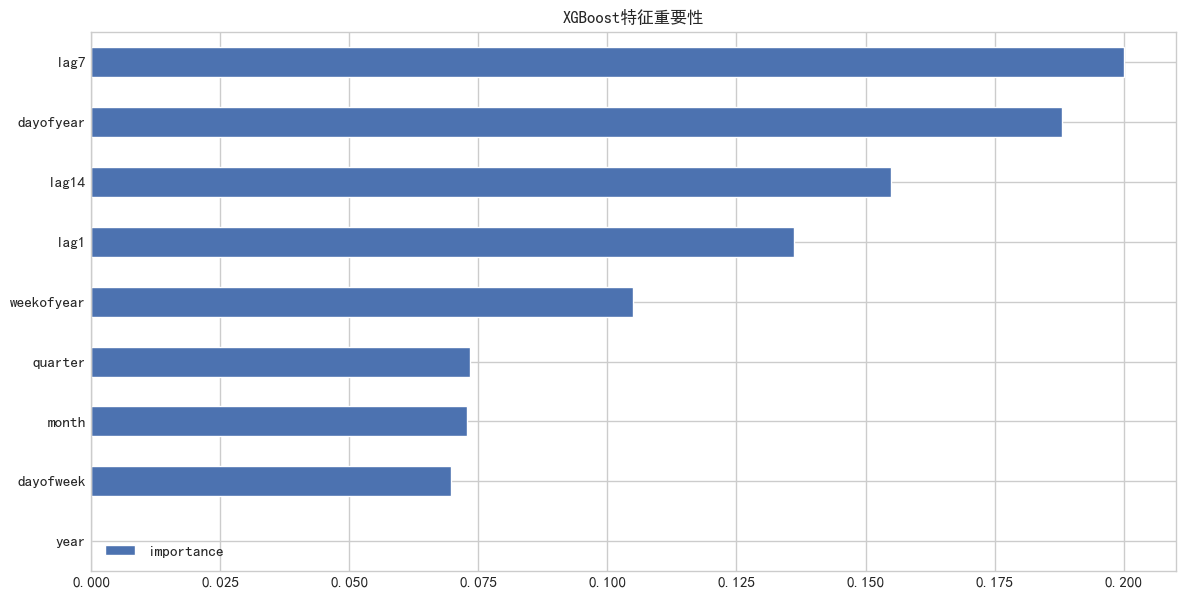

In [45]:
feature_importance = pd.DataFrame(data=xgb_model.feature_importances_,
                                  index=xgb_model.feature_names_in_,
                                  columns=['importance'])
feature_importance.sort_values('importance').plot(kind='barh', title='XGBoost特征重要性')
plt.show()
